In [1]:
from umap import UMAP
from pymethylprocess.MethylationDataTypes import MethylationArray
from pymethylprocess.general_machine_learning import MachineLearning
import pandas as pd, numpy as np
np.random.seed(7)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

/home/anepal/.conda/envs/env_name1/lib/python3.6/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:
methyl_array=MethylationArray.from_pickle("mydata/final_preprocessed/methyl_array.pkl")

# Make data ready

In [3]:
methyl_array.pheno['disease'] = methyl_array.pheno['disease'].replace('(?i)Control|healthy', 0, regex=True)

In [4]:
methyl_array.pheno['disease'] = methyl_array.pheno['disease'].replace('(?i)KDM6A variant|CHD7 variant|KMT2D variant|CHARGE|Kabuki', 1, regex=True)


In [5]:
methyl_array.pheno['disease'].value_counts()

0    125
1    109
Name: disease, dtype: int64

In [6]:
X=methyl_array.beta
y=methyl_array.pheno['disease']

In [7]:
X

,cg21272897,cg15794987,cg16464924,cg14112997,cg05248234,cg19697575,cg24007926,cg11738485,cg00540295,cg04922606,...,cg25705526,cg03086236,cg24393055,cg23624452,cg21555099,cg16789129,cg03685063,cg04218745,cg08176081,cg06831842
GSM2562699_9376525031_R05C01,0.052819,0.191709,0.130328,0.058860,0.072708,0.908099,0.140782,0.629844,0.870308,0.209249,...,0.063443,0.055758,0.045888,0.912921,0.895133,0.921040,0.892297,0.912038,0.902100,0.054662
GSM2562700_9376525031_R01C02,0.070844,0.921472,0.184245,0.063998,0.070263,0.911425,0.108898,0.676215,0.179023,0.214787,...,0.067165,0.061563,0.041819,0.929822,0.891815,0.928084,0.895657,0.896382,0.912232,0.047149
GSM2562701_9376525009_R05C01,0.063081,0.203897,0.904686,0.960809,0.841630,0.893030,0.873308,0.024726,0.882883,0.148466,...,0.066237,0.089574,0.069003,0.920742,0.878641,0.911794,0.890536,0.896523,0.906156,0.096697
GSM2562702_9376525033_R02C01,0.049681,0.881620,0.896432,0.757315,0.065795,0.900183,0.153685,0.680494,0.210269,0.897957,...,0.068821,0.056301,0.044580,0.910036,0.904865,0.933619,0.910947,0.913949,0.913150,0.039124
GSM2562703_9376525033_R04C02,0.047781,0.906742,0.108345,0.055259,0.081917,0.917374,0.186739,0.970643,0.901626,0.236428,...,0.088485,0.060268,0.051125,0.932019,0.904345,0.917894,0.899634,0.902735,0.907091,0.059548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2562931_200053730148_R04C01,0.081447,0.944890,0.968427,0.053447,0.098682,0.904583,0.922769,0.971683,0.202057,0.233809,...,0.090975,0.041755,0.038238,0.940326,0.884769,0.930863,0.895502,0.891576,0.921067,0.066160
GSM2562932_200053730148_R06C02,0.100090,0.911810,0.177087,0.712621,0.849690,0.895132,0.886342,0.967020,0.899153,0.210936,...,0.085955,0.052610,0.043332,0.932904,0.873256,0.932390,0.892273,0.898161,0.914315,0.055296
GSM2562933_200069280109_R01C01,0.094477,0.073766,0.918849,0.060908,0.854534,0.939896,0.216310,0.650401,0.194018,0.857829,...,0.062455,0.035868,0.049755,0.939810,0.890582,0.926838,0.899860,0.892840,0.907881,0.056734
GSM2562934_200069280109_R04C01,0.080999,0.912179,0.907959,0.059501,0.089129,0.908218,0.234954,0.642841,0.220750,0.225986,...,0.068858,0.053251,0.043608,0.921804,0.904112,0.918412,0.906834,0.907261,0.906572,0.055687


# Feature selection

In [8]:
# LASSO model:
lasso = Lasso(alpha=0.005)
# fitting the model:
lasso.fit(X, y)
# select all coefficients and the feature names
lasso_coefs = lasso.coef_
feature_names = X.columns

# collect the selected features:
selected_feature_indices = np.nonzero(lasso_coefs)[0]
selected_features = [feature_names[i] for i in selected_feature_indices]
X_selected = X.iloc[:, selected_feature_indices]

In [9]:
X_selected

,cg21272897,cg00540295,cg13573375,cg26469782,cg07437923,cg25013753,cg02622647,cg21792493,cg17348244,cg00944631,...,cg00313914,cg05463326,cg12128839,cg17881200,cg04152793,cg09906928,cg09549073,cg07422412,cg08425810,cg15832577
GSM2562699_9376525031_R05C01,0.052819,0.870308,0.166433,0.896546,0.576346,0.050153,0.058725,0.782309,0.911302,0.836648,...,0.305897,0.927956,0.895144,0.204533,0.823460,0.925809,0.866145,0.355195,0.596449,0.360058
GSM2562700_9376525031_R01C02,0.070844,0.179023,0.931845,0.712447,0.031227,0.575452,0.639726,0.184266,0.254100,0.693261,...,0.235950,0.945682,0.899112,0.228094,0.812089,0.894860,0.896620,0.482233,0.757910,0.570128
GSM2562701_9376525009_R05C01,0.063081,0.882883,0.908327,0.678414,0.619979,0.627453,0.789086,0.903637,0.228987,0.718303,...,0.482161,0.932079,0.854232,0.385732,0.798474,0.882117,0.832393,0.387651,0.689961,0.362760
GSM2562702_9376525033_R02C01,0.049681,0.210269,0.205257,0.896007,0.518584,0.535465,0.698805,0.734788,0.234749,0.696449,...,0.668183,0.937150,0.862948,0.445313,0.788004,0.927939,0.900055,0.423353,0.759525,0.593157
GSM2562703_9376525033_R04C02,0.047781,0.901626,0.927688,0.669973,0.031161,0.051015,0.619567,0.151091,0.252441,0.689140,...,0.318141,0.940385,0.748656,0.422630,0.815333,0.927033,0.789693,0.478505,0.807819,0.414840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2562931_200053730148_R04C01,0.081447,0.202057,0.216261,0.901577,0.525111,0.563537,0.703350,0.738533,0.236188,0.741966,...,0.372976,0.920295,0.513273,0.454536,0.248267,0.886392,0.646489,0.680658,0.801342,0.493710
GSM2562932_200053730148_R06C02,0.100090,0.899153,0.252815,0.469015,0.040570,0.043531,0.125512,0.207017,0.245697,0.689640,...,0.352452,0.940477,0.679688,0.548848,0.801949,0.927577,0.740718,0.739308,0.677500,0.553672
GSM2562933_200069280109_R01C01,0.094477,0.194018,0.228066,0.699133,0.570644,0.044885,0.034386,0.145340,0.255053,0.745644,...,0.558223,0.942535,0.533677,0.502966,0.847389,0.918218,0.657943,0.442908,0.752380,0.651785
GSM2562934_200069280109_R04C01,0.080999,0.220750,0.206289,0.652635,0.526659,0.530189,0.347917,0.769227,0.243066,0.100961,...,0.470444,0.934832,0.570604,0.619508,0.836111,0.893635,0.689422,0.496309,0.763641,0.566274


# test train split

In [10]:
# split data into training and testing data-sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=7)

In [11]:
y_test.value_counts(),y_train.value_counts()

(1    36
 0    35
 Name: disease, dtype: int64,
 0    90
 1    73
 Name: disease, dtype: int64)

# Cross validation

In [12]:
model = xgb.XGBClassifier(random_state=42)

# Defining parameter range
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1 ,0.01, 0.001],
    'n_estimators': [100]
}

grid = GridSearchCV(model, param_grid, refit=True, verbose=3)

# Fitting the model for grid search
grid.fit(X_train, y_train,eval_metric='rmse')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.909 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.939 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.879 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.812 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.906 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.970 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.848 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.848 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.938 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.844 tota

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
              

# choose best parameter

In [13]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# classification_report

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.90      0.72      0.80        36

    accuracy                           0.82        71
   macro avg       0.83      0.82      0.82        71
weighted avg       0.83      0.82      0.82        71



In [15]:
model_xgb = grid.best_estimator_
model_xgb.fit(X_train,y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_proba = model_xgb.fit(X_train, y_train,eval_metric='rmse').predict_proba(X_test)[:,1]

In [17]:
classes = model_xgb.classes_

In [18]:
classes

array([0, 1])

# Feature importance

In [19]:
# for important features:
important_feat = model_xgb.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:18]

In [20]:
df1 = X_selected.T

In [21]:
top_met = df1.iloc[idx]

In [22]:
top_met.index

Index(['cg17881200', 'cg12128839', 'cg08425810', 'cg09798888', 'cg19092981',
       'cg19022697', 'cg09549073', 'cg00231519', 'cg00313914', 'cg15832577',
       'cg00069771', 'cg12468774', 'cg22481673', 'cg01808284', 'cg06960717',
       'cg16370398', 'cg01655658', 'cg17187762'],
      dtype='object')

# further evaluation metrices:

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
auc_xg = roc_auc_score(y_test, y_proba)

In [25]:
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_proba)


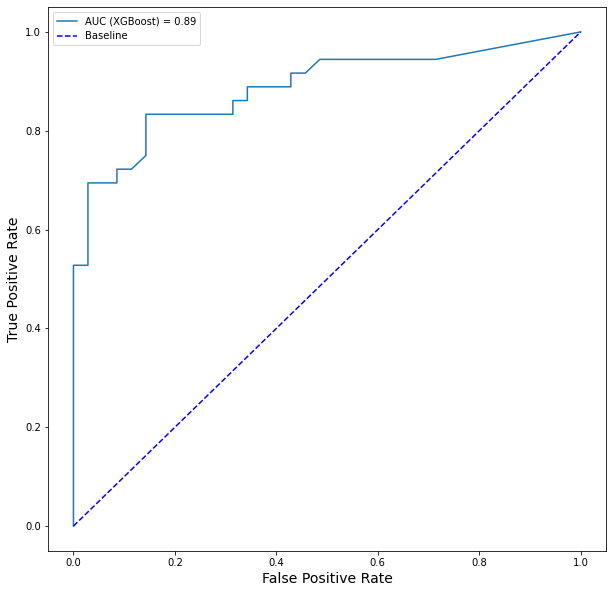

In [26]:
plt.figure(figsize=(10,10))
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
#plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

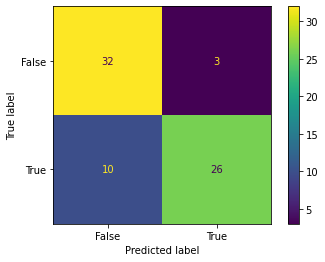

In [27]:
#######CONFUSION MATRIX ###########
from sklearn import metrics
y_test_pred_xgb = model_xgb.predict(X_test)
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

In [30]:
total1=sum(sum(confusion_matrix_test))
#####from confusion matrix calculate accuracy
accuracy1=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8169014084507042
Sensitivity :  0.9142857142857143
Specificity :  0.7222222222222222


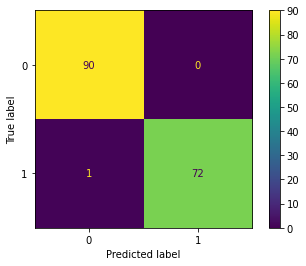

In [28]:
#######CONFUSION MATRIX ###########
y_train_pred_xgb = model_xgb.predict(X_train)
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train)
cm_display.plot()
plt.show()

In [31]:
total1=sum(sum(confusion_matrix_train))
#####from confusion matrix calculate accuracy
accuracy1=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9938650306748467
Sensitivity :  1.0
Specificity :  0.9863013698630136
